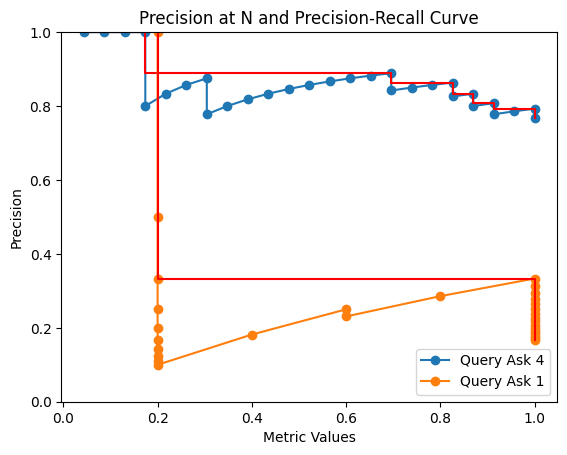

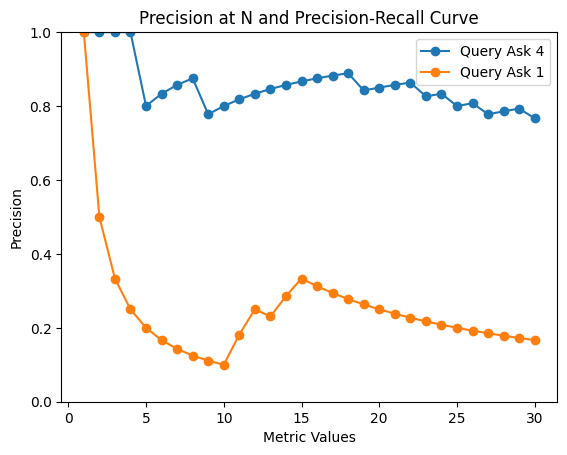

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

def read_csv(file_path):
    data = np.genfromtxt(file_path, delimiter=',', skip_header=1)
    return data[:, 0], data[:, 1], data[:, 2], data[:, 3]

def plot_precision_at_n(N_values, precision_values, label):
    plt.plot(N_values, precision_values, marker='o', label=label)

def plot_precision_recall_curve(recall, precision, label):
    decreasing_max_precision = np.maximum.accumulate(precision[::-1])[::-1]
    plt.plot(recall, precision, marker='o', linestyle='-', label=label)
    plt.step(recall, decreasing_max_precision, '-r')

def calculate_average_precision(y_true, y_scores):
    return average_precision_score(y_true, y_scores)

def calculate_map(N_values, precision_values):
    return np.trapz(precision_values, N_values) / np.max(N_values)

def process_and_plot_csv_files(file_paths, labels):
    for file_path, label in zip(file_paths, labels):
        N_values, precision_values, recall_values, f_measure_values = read_csv(file_path)

        # Plot Precision-Recall Curve
        plot_precision_recall_curve(recall_values, precision_values, label=label)

    plt.title('Precision at N and Precision-Recall Curve')
    plt.xlabel('Metric Values')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])  # Set y-axis limits from 0 to 1.0
    plt.legend()
    plt.show()

    for file_path, label in zip(file_paths, labels):
        N_values, precision_values, recall_values, f_measure_values = read_csv(file_path)

        # Plot Precision at N
        plot_precision_at_n(N_values, precision_values, label=label)

    plt.title('Precision at N and Precision-Recall Curve')
    plt.xlabel('Metric Values')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])  # Set y-axis limits from 0 to 1.0
    plt.legend()
    plt.show()

# Example usage:
csv_files = ['queries/ask4/metrics/metrics.csv', 'queries/ask1/metrics/metrics.csv']  # Replace with your file paths
labels = ['Query Ask 4', 'Query Ask 1']  # Replace with your desired labels
process_and_plot_csv_files(csv_files, labels)
